In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler as ss
from sklearn.preprocessing import Normalizer as nz


from sklearn.preprocessing import OneHotEncoder as ohe


from sklearn.model_selection import train_test_split


In [6]:

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [7]:

from xgboost.sklearn import XGBClassifier


In [8]:
from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from sklearn.inspection import permutation_importance


In [9]:
import time
import os
import gc
import random

from scipy.stats import uniform

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 100)

In [10]:
from sklearn.tree import DecisionTreeClassifier as dt

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
pd.options.display.max_columns = 300
np.set_printoptions(
                    threshold=np.inf,
                    precision=3
                    )

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
path = "/content/drive/MyDrive/DLNP Project/"


In [15]:
data=pd.read_csv(path + "startup data.csv")

In [16]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [17]:
xl=data.latitude.to_numpy()
yl=data.longitude.to_numpy()

In [18]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.7 MB/s eta 0:00:00


In [19]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


To draw Geoplot

{-60: ([<matplotlib.lines.Line2D at 0x7ed03c586770>],
  [Text(-400301.54742485227, 22300.057555453837, '60°S')]),
 -30: ([<matplotlib.lines.Line2D at 0x7ed03c5869b0>],
  [Text(-400301.54742485227, 4192410.8204253213, '30°S')]),
 0: ([<matplotlib.lines.Line2D at 0x7ed03c586c50>],
  [Text(-400301.54742485227, 7626619.683965213, '0°')]),
 30: ([<matplotlib.lines.Line2D at 0x7ed03c586ef0>],
  [Text(-400301.54742485227, 11083128.605060557, '30°N')]),
 60: ([<matplotlib.lines.Line2D at 0x7ed03c587190>],
  [Text(-400301.54742485227, 15253239.367930425, '60°N')]),
 90: ([<matplotlib.lines.Line2D at 0x7ed03c587430>],
  [Text(-400301.54742485227, 22277757.497898385, '90°N')])}

{-180: ([<matplotlib.lines.Line2D at 0x7ed03c5c4430>],
  [Text(40030.154742485225, -400301.5474248522, '180°'),
   Text(39990124.58774274, -400301.5474248522, '180°')]),
 -120: ([<matplotlib.lines.Line2D at 0x7ed03c5c4640>],
  [Text(6685035.8419950325, -400301.5474248522, '120°W')]),
 -60: ([<matplotlib.lines.Line2D at 0x7ed03c5c4970>],
  [Text(13370071.683990065, -400301.5474248522, '60°W')]),
 0: ([<matplotlib.lines.Line2D at 0x7ed03c5c4b80>],
  [Text(20055107.5259851, -400301.5474248522, '0°')]),
 60: ([<matplotlib.lines.Line2D at 0x7ed03c5c4e20>],
  [Text(26700113.213237647, -400301.5474248522, '60°E')]),
 120: ([<matplotlib.lines.Line2D at 0x7ed03c5c50c0>],
  [Text(33385149.055232678, -400301.5474248522, '120°E')]),
 180: ([<matplotlib.lines.Line2D at 0x7ed03c5c5360>],
  [Text(40030.154742485225, -400301.5474248522, '180°'),
   Text(39990124.58774274, -400301.5474248522, '180°')])}

Text(0.5, 1.0, 'Geographical Plot with Basemap')

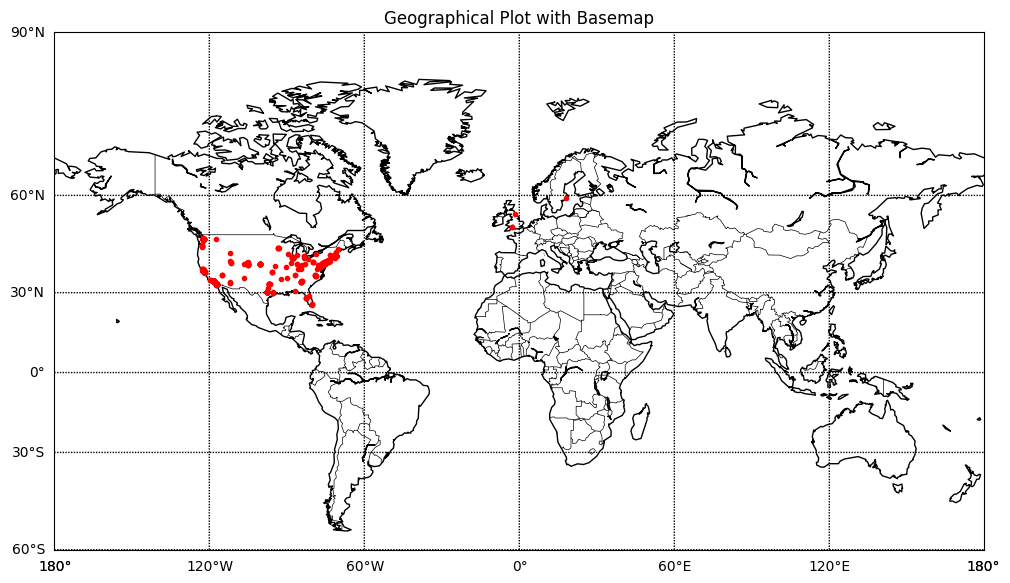

In [116]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create a new map using Basemap
fig = plt.figure(figsize=(12, 8), edgecolor='w')
map = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
              llcrnrlon=-180,urcrnrlon=180,resolution='c')

# Draw coastlines and countries
map.drawcoastlines()
map.drawcountries()

# Draw parallels and meridians
map.drawparallels(range(-90,91,30), labels=[1,0,0,0])
map.drawmeridians(range(-180,181,60), labels=[0,0,0,1])

# Plot a point
#lat= 40.712
#lon=-74.0060
for i in range (923):
  lat= xl[i]
  lon= yl[i]
  x, y = map(lon, lat)
  map.plot(x, y, marker='o', color='r', markersize=3)



# Add a title
plt.title('Geographical Plot with Basemap')

# Show the plot
plt.show()


In [21]:
data["status"].unique()

array(['acquired', 'closed'], dtype=object)

In [22]:
data["labels"].unique()

array([1, 0])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [24]:
data=data.drop(columns =["Unnamed: 0","zip_code","id","city","Unnamed: 6","name","labels","founded_at","closed_at","first_funding_at","last_funding_at"],axis=1)

In [25]:
data.head()

,state_code,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [26]:
data=data.drop(columns=["state_code","state_code.1","category_code","object_id","is_top500","milestones"],axis=1)

In [27]:
data.head(5)

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,status
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,acquired
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,acquired
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,acquired
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,acquired
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,closed


In [28]:
data["status"].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoder = LabelEncoder()

In [39]:
data["status"] = label_encoder.fit_transform(data["status"])
data.head()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,status
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,0
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,0
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,0
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1


In [57]:
new_data=data
y=new_data["status"]
x=new_data.iloc[:,:-1]


In [58]:
import scipy
from scipy import stats
x[["latitude","longitude","funding_total_usd"]] = stats.zscore(x[["latitude","longitude","funding_total_usd"]])
x

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants
0,1.027268,1.451271,2.2493,3.0027,4.6685,6.7041,3,3,-0.132140,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000
1,-0.341900,-0.823630,5.1260,9.9973,7.0055,7.0055,9,4,0.077455,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500
2,-1.501922,-0.610018,1.0329,1.0329,1.4575,2.2055,5,1,-0.120401,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000
3,-0.320134,-0.827040,3.1315,5.3151,6.0027,6.0027,5,3,0.076928,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333
4,-0.197397,-0.843535,0.0000,1.6685,0.0384,0.0384,2,2,-0.127260,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,-0.207743,-0.841624,0.5178,0.5178,0.5808,4.5260,9,1,-0.128315,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000
919,1.066294,1.445070,7.2521,9.2274,6.0027,6.0027,1,3,0.140242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667
920,-0.296615,-0.825515,8.4959,8.4959,9.0055,9.0055,5,1,0.098032,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000
921,-0.256911,-0.837688,0.7589,2.8329,0.7589,3.8356,12,2,-0.052338,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000


In [59]:
x['age_first_milestone_year']=x['age_first_milestone_year'].fillna(0)
x['age_last_milestone_year']=x['age_last_milestone_year'].fillna(0)
x['age_last_milestone_year'].isnull().sum(),x['age_first_milestone_year'].isnull().sum()

(0, 0)

In [60]:
x

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants
0,1.027268,1.451271,2.2493,3.0027,4.6685,6.7041,3,3,-0.132140,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000
1,-0.341900,-0.823630,5.1260,9.9973,7.0055,7.0055,9,4,0.077455,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500
2,-1.501922,-0.610018,1.0329,1.0329,1.4575,2.2055,5,1,-0.120401,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000
3,-0.320134,-0.827040,3.1315,5.3151,6.0027,6.0027,5,3,0.076928,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333
4,-0.197397,-0.843535,0.0000,1.6685,0.0384,0.0384,2,2,-0.127260,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,-0.207743,-0.841624,0.5178,0.5178,0.5808,4.5260,9,1,-0.128315,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000
919,1.066294,1.445070,7.2521,9.2274,6.0027,6.0027,1,3,0.140242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667
920,-0.296615,-0.825515,8.4959,8.4959,9.0055,9.0055,5,1,0.098032,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000
921,-0.256911,-0.837688,0.7589,2.8329,0.7589,3.8356,12,2,-0.052338,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000


In [61]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  923 non-null    float64
 1   longitude                 923 non-null    float64
 2   age_first_funding_year    923 non-null    float64
 3   age_last_funding_year     923 non-null    float64
 4   age_first_milestone_year  923 non-null    float64
 5   age_last_milestone_year   923 non-null    float64
 6   relationships             923 non-null    int64  
 7   funding_rounds            923 non-null    int64  
 8   funding_total_usd         923 non-null    float64
 9   is_CA                     923 non-null    int64  
 10  is_NY                     923 non-null    int64  
 11  is_MA                     923 non-null    int64  
 12  is_TX                     923 non-null    int64  
 13  is_otherstate             923 non-null    int64  
 14  is_softwar

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [64]:
n_estimators = 100  # Number of decision trees in the forest
max_depth = 8   # Maximum depth of each decision tree (None means unlimited)
random_state = 100   # Random seed for reproducibility
clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

In [65]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=100)

In [66]:
clf.n_estimators

100

In [67]:
clf.score(X_test,y_test)

0.7837837837837838

In [68]:
y_pred = clf.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(y_test, y_pred)

accuracy_score(y_test,y_pred)

f1_score(y_test,y_pred)

array([[103,  13],
       [ 27,  42]])

0.7837837837837838

0.6774193548387097

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7837837837837838


BOOSTING

ADABOOST

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [72]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.2)

In [73]:
base_estimator = DecisionTreeClassifier(max_depth=5, random_state=0)

In [74]:
n_estimators = 50  # Number of weak learners (base estimators)
learning_rate = 0.25  # The contribution of each classifier to the final vote
random_state = 42   # Random seed for reproducibility
clfl = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)

In [75]:
clfl.fit(X_train_1, y_train_1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         random_state=0),
                   learning_rate=0.25, random_state=42)

In [76]:
y_pred_AD = clfl.predict(X_test_1)

In [77]:
accuracy = accuracy_score(y_test_1, y_pred_AD)
print("Accuracy:", accuracy)

Accuracy: 0.772972972972973


Logistic Regression


In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [79]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [80]:
clf1 = LogisticRegression()

In [81]:
clf1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
y_pred_b = clf1.predict(X_test)

In [83]:
accuracy1 = accuracy_score(y_test, y_pred_b)
print("Accuracy:", accuracy1)

Accuracy: 0.7405405405405405


Creating a pipeline to apply **Grid search** to find more useful parameters


**Grid search**

In [84]:
steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

In [85]:
pipe_xg = Pipeline(steps_xg)

In [86]:
pipe_xg.get_params()

{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=3, num_parallel_tree=None,
                 predictor=None, random_state=None, ...))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(base_score=None, booster=None, callbacks=None,
     

In [87]:
parameters = {'xg__learning_rate':  [0.03, 0.05],
              'xg__n_estimators':   [200,  300],
              'xg__max_depth':      [4,6],
              'pca__n_components' : [31],
              'xg__booster': ['gbtree','gblinear']
}

In [88]:
clf_2 = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 3,         # USe parallel cpu threads
                   cv =4 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )





**Model fitting**

In [89]:


start = time.time()
clf_2.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60


Fitting 4 folds for each of 16 candidates, totalling 64 fits
[04:36:18] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "silent" } are not used.



GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importan...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=3,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=3,
             param_grid={'pca__n_components': [31],
                         'xg__booster': ['gbtree', 'gblinear'],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [4, 6],
                         'xg__n_estimators': [200, 300]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

0.6461882432301839

In [90]:

f"Best score: {clf_2.best_score_} "


print()
f"Best parameter set {clf_2.best_params_}"

'Best score: 0.7772228582260542 '

"Best parameter set {'pca__n_components': 31, 'xg__booster': 'gblinear', 'xg__learning_rate': 0.05, 'xg__max_depth': 4, 'xg__n_estimators': 200}"

In [91]:

y_pred_3 = clf_2.predict(X_test)
print("--Few predictions--\n")
y_pred_3[:4]


--Few predictions--



array([0, 0, 0, 1])

In [92]:
# 7.5 Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred_3)
accuracy * 100.0




--Accuracy Score--



74.5945945945946

In [93]:

confusion_matrix( y_test,y_pred_3)

array([[98, 18],
       [29, 40]])

In [94]:

print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred_3, pos_label = 1)

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred_3, pos_label = 0)



--F1 Score pos-label: 1--



0.6299212598425198



--F1 Score pos-label: 0--



0.8065843621399178

In [95]:


print("\n\n--How many features--\n")
clf_2.best_estimator_.named_steps["xg"].feature_importances_.shape

# 7.9.1
print("\n\n---Feature importances---\n")
clf_2.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



(31,)



---Feature importances---



array([ 2.723e-02,  2.122e-03,  3.214e-02,  7.207e-04,  2.081e-02,
       -1.427e-04, -3.431e-03,  1.086e-03,  9.914e-03,  4.742e-03,
       -6.473e-03, -1.293e-02, -5.994e-04,  2.767e-03,  6.687e-04,
       -1.990e-03, -7.294e-03,  1.123e-02, -1.194e-03, -8.552e-03,
        8.960e-03,  2.817e-02, -1.319e-02, -1.411e-02,  6.957e-03,
       -1.849e-02, -2.510e-02,  1.112e-02,  1.686e-02,  9.280e-01,
        0.000e+00], dtype=float32)

In [96]:
colnames = x.columns.to_list()

In [97]:


imp_values = clf_2.best_estimator_.named_steps["xg"].feature_importances_


df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

# 7.10.1
df_imp


,imp
has_roundA,-0.025105
has_angel,-0.018493
is_othercategory,-0.014105
is_consulting,-0.013195
is_MA,-0.012934
is_gamesvideo,-0.008552
is_mobile,-0.007294
is_NY,-0.006473
relationships,-0.003431
is_web,-0.001990


In [98]:


list(df_imp.index.values[:10])


['has_roundA',
 'has_angel',
 'is_othercategory',
 'is_consulting',
 'is_MA',
 'is_gamesvideo',
 'is_mobile',
 'is_NY',
 'relationships',
 'is_web']

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
a_train,b_train,a_test,b_test= train_test_split(x,y,test_size=0.2)

Applying Xgb classifier again after removal of less important features from dataset

In [101]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [108]:
b=y
a=x.drop(columns = ['has_roundA',
 'has_angel',
 'is_othercategory',
 'is_consulting',
 'is_MA',
 'is_gamesvideo',
 'is_mobile',
 'is_NY',
 'relationships',
 'is_web'], axis = 1)
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 923 entries, 0 to 922
Series name: status
Non-Null Count  Dtype
--------------  -----
923 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


In [109]:
a_train,a_test,b_train,b_test= train_test_split(a,y)

In [110]:
xgb_classifier = XGBClassifier()

In [111]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 1.0],
}

In [112]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(a_train, b_train )

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [113]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [114]:
best_model = grid_search.best_estimator_
y_pred_4 = best_model.predict(a_test)

In [115]:
accuracy = accuracy_score(b_test, y_pred_4)
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)



Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
Best Score: 0.7875716817850068
Test Accuracy: 0.7662337662337663


#The End#








